<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/EyeDiseaseIdentificationDL_(Best_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

100% 734M/736M [00:21<00:00, 38.1MB/s]
100% 736M/736M [00:21<00:00, 36.0MB/s]


In [4]:
from zipfile import ZipFile

dataset = '/content/eye-diseases-classification.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('dataset is extracted')

dataset is extracted


In [5]:
import os
# counting the number of files in each dataset folder
path, dirs, files = next(os.walk('/content/dataset/normal'))
file_count = len(files)
print("Number of Images:  ", file_count)

Number of Images:   1074


In [6]:
# total no. of images for each disease

# cataract -> 1038
# diabetic -> 1098
# glaucoma -> 1007
# normal   -> 1074
# total = 4217

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import cv2

In [8]:
# resizing the image
# creating a sinigle list which has the path of all the images

labels = []
image_path_list = []
# cataract -> 0
# diabetic -> 1
# glaucoma -> 2
# normal   -> 3

##############
train_data_folder_path = '/content/dataset/cataract/'
filename = os.listdir('/content/dataset/cataract')
for i in range(1038):
  labels.append(0)
  img_path = train_data_folder_path + str(filename[i])

  img = Image.open(img_path)
  img = img.resize((128, 128))
  img = img.convert('RGB')
  img.save(img_path)

  image_path_list.append(img_path)
  
##############
train_data_folder_path = '/content/dataset/diabetic_retinopathy/'
filename = os.listdir('/content/dataset/diabetic_retinopathy')
for i in range(1098):
  labels.append(1)
  img_path = train_data_folder_path + str(filename[i])

  img = Image.open(img_path)
  img = img.resize((128, 128))
  img = img.convert('RGB')
  img.save(img_path)

  image_path_list.append(img_path)

##############
train_data_folder_path = '/content/dataset/glaucoma/'
filename = os.listdir('/content/dataset/glaucoma')
for i in range(1007):
  labels.append(2)
  img_path = train_data_folder_path + str(filename[i])

  img = Image.open(img_path)
  img = img.resize((128, 128))
  img = img.convert('RGB')
  img.save(img_path)

  image_path_list.append(img_path)

##############
train_data_folder_path = '/content/dataset/normal/'
filename = os.listdir('/content/dataset/normal')
for i in range(1074):
  labels.append(3)
  img_path = train_data_folder_path + str(filename[i])

  img = Image.open(img_path)
  img = img.resize((128, 128))
  img = img.convert('RGB')
  img.save(img_path)

  image_path_list.append(img_path)

In [9]:
print(len(image_path_list))

4217


In [10]:
image_path_list[4216]

'/content/dataset/normal/3242_left.jpg'

In [11]:
image = mpimg.imread(image_path_list[200])
image = np.array(image)
image.shape

(128, 128, 3)

In [12]:
images_numpy_list = []

for i in range(4217):
  image = mpimg.imread(image_path_list[i])
  image = np.array(image)
  images_numpy_list.append(image)

print(len(images_numpy_list))

4217


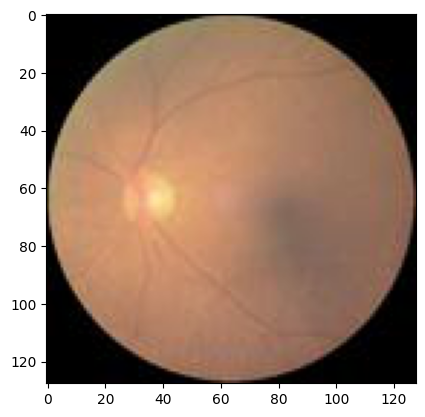

In [13]:
img = Image.open('/content/dataset/cataract/1102_left.jpg')  # this iwll read the image file
imgplot = plt.imshow(img)
plt.show()

In [14]:
#counting the images 
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1 2 3]
[1038 1098 1007 1074]


In [15]:
# converting image list and label list to numpy arrays
x = np.array(images_numpy_list)
y = np.array(labels)

In [16]:
print(x.shape)
print(y.shape)

(4217, 128, 128, 3)
(4217,)


Train Test Split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=2, stratify=y)
print(x.shape, x_train.shape, x_test.shape)

(4217, 128, 128, 3) (3373, 128, 128, 3) (844, 128, 128, 3)


In [18]:
# to check if the dataset was eually splitted in training and testing data with respect to different objects
# every label(0-4) must have nearly 800 occurences
from collections import OrderedDict

res =  [(el, list(y_train).count(el)) for el in list(y_train)]
print(list(OrderedDict(res).items()))

[(2, 806), (1, 878), (0, 830), (3, 859)]


Normalizing

In [19]:
x_train_scaled = x_train/255;
x_test_scaled = x_test/255

# Building the Neural Network

DenseNet201

In [20]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model 
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras import optimizers

num_of_classes = 4
convolutional_base = DenseNet201(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

model = models.Sequential()
model.add(layers.UpSampling2D((2, 2)))
model.add(convolutional_base)
model.add(layers.Flatten()) # converts the matrix in 1-D
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) # turns off a few neurons to prevent over-fitting 
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=12)

74836368/74836368 [==============================] - 3s 0us/step
Epoch 1/12
95/95 [==============================] - 200s 843ms/step - loss: 1.2709 - acc: 0.4956 - val_loss: 1.1395 - val_acc: 0.5355
Epoch 2/12
95/95 [==============================] - 64s 669ms/step - loss: 0.8458 - acc: 0.6478 - val_loss: 0.9058 - val_acc: 0.6805
Epoch 3/12
95/95 [==============================] - 64s 670ms/step - loss: 0.6627 - acc: 0.7410 - val_loss: 0.8484 - val_acc: 0.7160
Epoch 4/12
95/95 [==============================] - 63s 662ms/step - loss: 0.5817 - acc: 0.7848 - val_loss: 0.6767 - val_acc: 0.7574
Epoch 5/12
95/95 [==============================] - 63s 661ms/step - loss: 0.4986 - acc: 0.8198 - val_loss: 0.6296 - val_acc: 0.7929
Epoch 6/12
95/95 [==============================] - 63s 661ms/step - loss: 0.4292 - acc: 0.8471 - val_loss: 0.5407 - val_acc: 0.8047
Epoch 7/12
95/95 [==============================] - 63s 661ms/step - loss: 0.3787 - acc: 0.8771 - val_loss: 0.4955 - val_acc: 0.8284
Epo

In [21]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)

27/27 [==============================] - 7s 267ms/step - loss: 0.3073 - acc: 0.8874
test accuracy for DenseNet201 =  0.8874407410621643


In [27]:
print("test accuracy for DenseNet201 = ", round(accuracy, 2)*100,"%")

test accuracy for DenseNet201 =  89.0 %


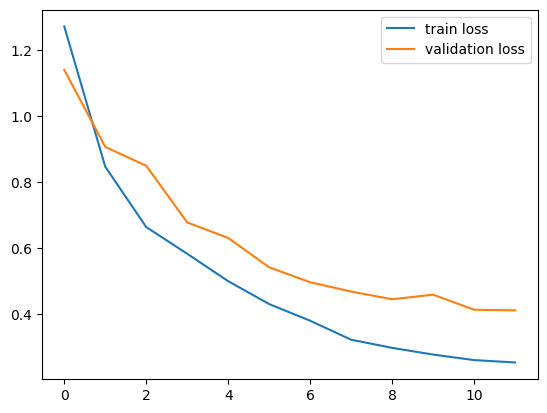

In [22]:
h = history

# plot the loss function value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

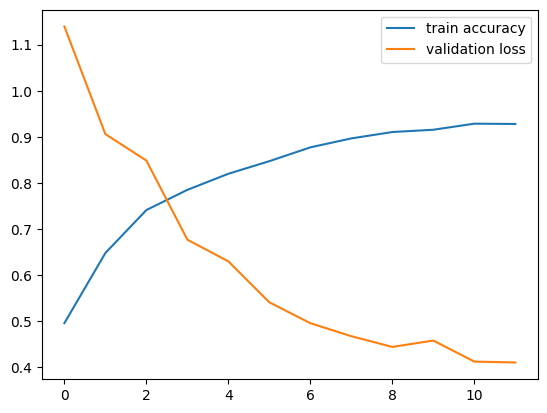

In [23]:
# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

ResNet50